# Decision Theory: Hands-on

Alípio Jorge

# Bayes decision boundary

- The decision boundary defined by the optimal **BC** is the **Bayes Decision Boundary**
    - The **BDB** is optimal (from the Bayesian Decision Theory point of view)
    - It is usually not possible to determine, unless we know the densities behind

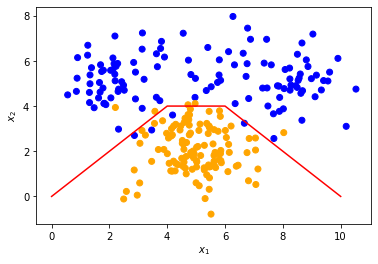

In [62]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

X,_ = make_blobs(n_samples=[50,20,50,120], centers=[(2,5),(5,6),(8,5),(5,2)], 
                 n_features=2, cluster_std=[1,1,1,1],
                 random_state=1, shuffle=False)

y=np.array([0]*120+[1]*120)

cmap = colors.ListedColormap(['blue','orange'])

bdb=[(0,0),(4,4),(6,4),(10,0)]
xbdb=np.array([x for (x,_) in bdb ])
ybdb=np.array([y for (_,y) in bdb ])

ax=plt.axes()
ax.scatter(X[:,0],X[:,1],color=cmap(y))
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.plot(xbdb,ybdb,color='red');

# Bayes decision boundary

- We can determine the Bayes Decision Boundary if we know the densities behind
    - In the example, we have 4 bivariate normals with the same standard deviation

# Bayes decision boundary

- kNN can approximate the Bayes Decision Boundary

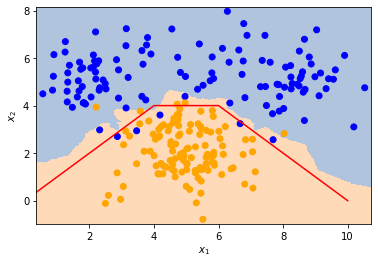

In [63]:
from sklearn.neighbors import KNeighborsClassifier as kNN

model=kNN(n_neighbors=5).fit(X,y)

def plot_classifier_boundary(model,X,h = .05):
    # this function can be used with any sklearn classifier
    # ready for two classes but can be easily extended
    cmap_light = colors.ListedColormap(['lightsteelblue', 'peachpuff'])
    x_min, x_max = X[:, 0].min()-.2, X[:, 0].max()+.2
    y_min, y_max = X[:, 1].min()-.2, X[:, 1].max()+.2
    # generate a grid with step h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    # the method ravel flattens xx and yy
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    plt.xlim((x_min,x_max))
    plt.ylim((y_min,y_max))


plot_classifier_boundary(model,X)

plt.scatter(X[:,0],X[:,1],color=cmap(y))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.plot(xbdb,ybdb,color='red');

## Bayes decision Boundary for generic blobs

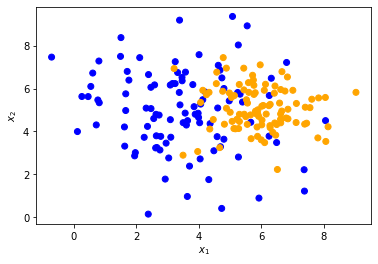

In [64]:
n_points=100
std1=2
std2=1

X,_ = make_blobs(n_samples=[n_points,n_points], centers=[(3,5),(6,5)], 
                 n_features=2, cluster_std=[std1,std2],
                 random_state=1, shuffle=False)

y=np.array([0]*n_points+[1]*n_points)

cmap = colors.ListedColormap(['blue','orange'])

plt.scatter(X[:,0],X[:,1],color=cmap(y))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$');

In [65]:
# How to determine the most probable class from the distributions
# 

from scipy.stats import multivariate_normal

# Make sure you understand the covariance matrix
dens1 = multivariate_normal(mean=[3,5],cov=[[std1,0],[0,std1]])
dens2 = multivariate_normal(mean=[6,5],cov=[[std2,0],[0,std2]])

# we can define a new model that does not have to be learned as a python class
# this is the bayesian classifier
# the predict method can be used in the standards way

class bc:
    def __init__(self,dens1,dens2):
        self.dens1 = dens1
        self.dens2 = dens2
    def unipredict(self,x):
        if self.dens1.pdf(x)>self.dens2.pdf(x):
            return 0
        else:
            return 1
    def predict(self,X):
        return np.array(list(map(lambda x: self.unipredict(x),X)))

# how to use
model=bc(dens1,dens2)
model.predict(np.array([[3,5],[2,1],[10,5]]))

array([0, 0, 1])

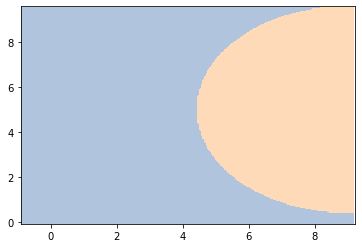

In [66]:
plot_classifier_boundary(model,X)